In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글 폰트 설치 
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import re 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm   
import numpy as np 
import seaborn as sns 

# 마이너스 폰트 깨짐 방지 
mpl.rcParams['axes.unicode_minus'] = False   
%matplotlib inline 

In [3]:
item = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/recom_dataset/dog_item.csv')

item.head()

,goodsno,goodsnm
0,4,아리아스 렘앤라이스 어덜트 미니 1.2kg(작은알갱이)
1,9,아리아스 퍼피 램앤라이스 7.5kg
2,11,아리아스 퍼피 렘앤라이스 1.2kg
3,14,퓨리나 프로플랜 퍼포먼스 3kg
4,16,프로플랜 어덜트 퍼포먼스 17kg


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/recom_dataset/dog_ratings.csv')

data.head()

,m_no,goodsno,point,regdt,pet_age,dogname
0,29471,259,5.0,2010-04-26 21:45:48.000,2.0,푸들
1,29471,256,5.0,2010-04-26 22:17:25.000,2.0,푸들
2,29471,258,5.0,2010-04-26 22:22:00.000,2.0,푸들
3,29471,35564,3.0,2017-01-29 15:07:09.000,9.0,푸들
4,29471,3042,5.0,2009-04-26 22:17:25.000,1.0,푸들


In [ ]:
len(data)

2455809

In [ ]:
goods_link = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/origin_dataset/dogpre.gd_goods_link_202203161106.csv')
goods_link.head(1)

,sno,goodsno,category,sort,hidden
0,4,4,1001,-1185200690,1


In [ ]:
dog_category = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/origin_dataset/dogpre.gd_category_202203161107.csv')
dog_category.head(1)

,sno,catnm,category,sort,hidden,has_image,image_file_name,event,om_category,openmarket,percent
0,128,사은품,16,15,1,0,NaN,0,NaN,NaN,0


In [ ]:
dog_data = pd.merge(data, goods_link, on='goodsno')
dog_data

,m_no,goodsno,point,regdt,pet_age,dogname,sno,category,sort,hidden
0,29471,259,5.0,2010-04-26 21:45:48.000,2.0,푸들,63874,44007,0,0
1,262432,259,4.0,2015-01-27 20:49:33.000,7.0,푸들,63874,44007,0,0
2,294441,259,4.0,2015-02-24 18:24:01.000,3.0,푸들,63874,44007,0,0
3,213530,259,5.0,2015-03-08 13:35:17.000,4.0,비숑 프리제,63874,44007,0,0
4,61889,259,3.0,2015-03-23 01:11:09.000,1.0,말티즈,63874,44007,0,0
...,...,...,...,...,...,...,...,...,...,...
2455804,1194472,83331,4.0,2021-12-22 18:00:42.000,4.0,폼피츠,155626,45006,0,0
2455805,1054843,67525,5.0,2020-06-01 11:26:26.000,6.0,보스턴 테리어,121588,36008,0,0
2455806,1196630,64339,5.0,2021-12-17 21:45:03.000,4.0,푸들,114571,40004,0,0
2455807,1110982,61699,5.0,2020-05-18 20:09:33.000,2.0,토이 푸들,111301,44003,0,0


In [ ]:
dog_data = pd.merge(dog_data, dog_category, on='category')
dog_data

,m_no,goodsno,point,regdt,pet_age,dogname,sno_x,category,sort_x,hidden_x,sno_y,catnm,sort_y,hidden_y,has_image,image_file_name,event,om_category,openmarket,percent
0,29471,259,5.0,2010-04-26 21:45:48.000,2.0,푸들,63874,44007,0,0,429,신발/양말,71,0,0,NaN,0,NaN,NaN,0
1,262432,259,4.0,2015-01-27 20:49:33.000,7.0,푸들,63874,44007,0,0,429,신발/양말,71,0,0,NaN,0,NaN,NaN,0
2,294441,259,4.0,2015-02-24 18:24:01.000,3.0,푸들,63874,44007,0,0,429,신발/양말,71,0,0,NaN,0,NaN,NaN,0
3,213530,259,5.0,2015-03-08 13:35:17.000,4.0,비숑 프리제,63874,44007,0,0,429,신발/양말,71,0,0,NaN,0,NaN,NaN,0
4,61889,259,3.0,2015-03-23 01:11:09.000,1.0,말티즈,63874,44007,0,0,429,신발/양말,71,0,0,NaN,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455804,840981,82796,5.0,2021-12-15 13:18:43.000,2.0,기타견종,154415,58003,0,0,554,가전,98,0,0,NaN,0,NaN,NaN,0
2455805,1151233,84019,5.0,2021-02-22 22:08:13.000,6.0,잉글리쉬 스프링거 스파니엘,157455,58003,0,0,554,가전,98,0,0,NaN,0,NaN,NaN,0
2455806,628850,69304,5.0,2021-06-27 20:23:24.000,8.0,푸들,157483,58003,0,0,554,가전,98,0,0,NaN,0,NaN,NaN,0
2455807,420524,31805,5.0,2016-03-05 16:36:37.000,2.0,보스턴 테리어,72998,42005,0,0,415,야외용,59,0,0,NaN,0,NaN,NaN,0


In [ ]:
dog_data.columns

Index(['m_no', 'goodsno', 'point', 'regdt', 'pet_age', 'dogname', 'sno_x',
       'category', 'sort_x', 'hidden_x', 'sno_y', 'catnm', 'sort_y',
       'hidden_y', 'has_image', 'image_file_name', 'event', 'om_category',
       'openmarket', 'percent'],
      dtype='object')

In [ ]:
data_cols = ['m_no', 'goodsno', 'point', 'regdt', 'pet_age', 'dogname', 'catnm']
dog_data = dog_data[data_cols]

dog_data.head(3)

,m_no,goodsno,point,regdt,pet_age,dogname,catnm
0,29471,259,5.0,2010-04-26 21:45:48.000,2.0,푸들,신발/양말
1,262432,259,4.0,2015-01-27 20:49:33.000,7.0,푸들,신발/양말
2,294441,259,4.0,2015-02-24 18:24:01.000,3.0,푸들,신발/양말


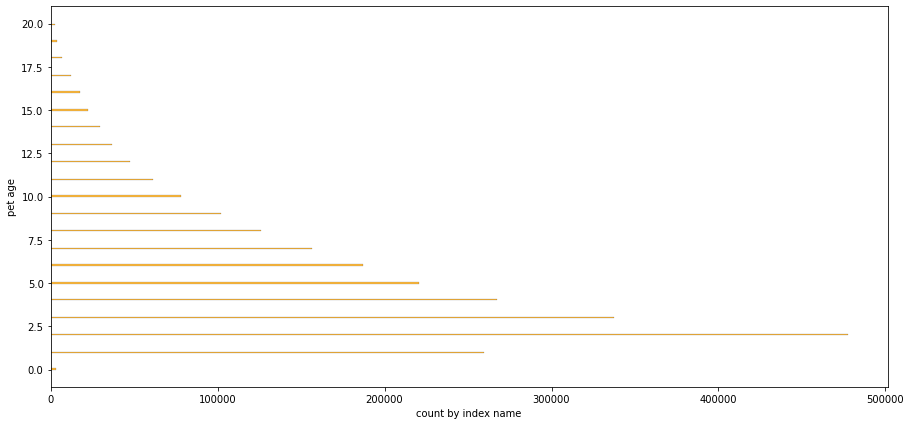

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=dog_data, y='pet_age', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('pet age')
plt.show()

#### 고객 평점 평균 분석 

In [ ]:
customer_avg_point = pd.DataFrame(data.groupby(['m_no'])['point'].mean().rename('avg_score'))
customer_avg_point.sort_values('avg_score', ascending=True)

In [ ]:
black_list = customer_avg_point.sort_values('avg_score', ascending=True)[:20].index
black_list

Int64Index([ 550910,  701174,  317204, 1159726,  886941,  580649,  984175,
             283783,  527039,  983794, 1020043,  181175, 1148226,  646586,
            1164409,  112459,  263335,  751628,  582458,  826383],
           dtype='int64', name='m_no')

In [ ]:
customer_point = pd.DataFrame(data.groupby(['m_no', 'point'])['goodsno'].count().rename('count'))
customer_point.reset_index(inplace=True)

In [ ]:
customer_point['point'] = customer_point['point'].apply(lambda x: str(int(x)) + '점')
# customer_point['count'] = customer_point['count'].apply(lambda x: str(int(x)) + '개')
customer_point

,m_no,point,count
0,0,2점,3
1,0,3점,1
2,0,4점,5
3,0,5점,17
4,33,4점,3
...,...,...,...
211037,1220981,5점,8
211038,1221161,5점,3
211039,1221295,5점,2
211040,1221394,4점,1


In [ ]:
ratings = customer_point.pivot(index='m_no', columns='point', values='count')
ratings

point,0점,1점,2점,3점,4점,5점
m_no,,,,,,
0,NaN,NaN,3.0,1.0,5.0,17.0
33,NaN,NaN,NaN,NaN,3.0,13.0
39,NaN,NaN,1.0,NaN,16.0,10.0
43,NaN,NaN,NaN,NaN,NaN,10.0
119,NaN,NaN,NaN,9.0,16.0,35.0
...,...,...,...,...,...,...
1220830,NaN,NaN,NaN,1.0,2.0,NaN
1220981,NaN,NaN,NaN,NaN,NaN,8.0
1221161,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
ratings_bad = ratings[ratings.index.isin(black_list)]

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline     

plt.rcParams['font.family'] = 'NanumGothic' 

In [ ]:
import matplotlib.font_manager as fm   

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [ ]:
plt.figure(figsize=(20,10))
plt.title('평점 평균이 낮은 고객 Top 20 평점 별 시각화', fontsize=15, pad=10, fontweight='bold')
ax = sns.heatmap(data = ratings_bad, annot=True, cmap='Blues')

In [ ]:
customer_avg_point[customer_avg_point.index==540758]

,avg_score
m_no,
540758,2.333333


In [ ]:
dog_ratings = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/recom_dataset/dog_data_kfold.csv')
dog_ratings = dog_ratings.drop('regdt', axis=1)

In [ ]:
dog_item = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/recom_dataset/dog_item.csv')
dog_item.set_index('goodsno', inplace=True)

In [ ]:
X = dog_ratings.copy()

X.columns

Index(['m_no', 'goodsno', 'point', 'pet_age', 'dogname'], dtype='object')

In [ ]:
from sklearn.model_selection import StratifiedKFold 

def split_df(df, kfold_n=5):
    '''
    df col: img_path, label
    '''
    kfold = StratifiedKFold(n_splits=kfold_n, shuffle=True, random_state=42)
    
    # 클래스 비율 고려하여 Fold 별로 데이터 분리 
    X = np.array(df) 
    y = df.m_no.values 
    
    datas = [] 
    for i, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        train_df = df.iloc[train_idx].copy().reset_index(drop=True)
        test_df = df.iloc[val_idx].copy().reset_index(drop=True) 
        
        datas.append((train_df, test_df))
    return datas

datas = split_df(X)

In [ ]:
len(datas[0][0]['goodsno'].unique()), len(datas[0][1]['goodsno'].unique())

(5720, 3460)

In [ ]:
dog_goods = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/recom_dataset/dog_item.csv')

dog_goods

,goodsno,goodsnm
0,4,아리아스 렘앤라이스 어덜트 미니 1.2kg(작은알갱이)
1,9,아리아스 퍼피 램앤라이스 7.5kg
2,11,아리아스 퍼피 렘앤라이스 1.2kg
3,14,퓨리나 프로플랜 퍼포먼스 3kg
4,16,프로플랜 어덜트 퍼포먼스 17kg
...,...,...
51851,71665,앱솔루트 홀리스틱 닭고기&호키 독 25g
51852,86374,네츄럴코어 치킨 주식 캔 80g
51853,71671,앱솔루트 홀리스틱 양고기&연어 독 25g
51854,20438,리틀달링 윙 사사미 300g


#### 카테고리 별 평점 평균 변화 분석 

In [5]:
reviews = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/review_dataset/etc/dog_reviews_400000.csv')

reviews

,sno,goodsno,point,regdt,m_no,contents,pet_age,sex,dogname,catnm,recomm
0,18649609,85041,5.0,2017-03-17 13:34:20.000,655259,고구마 맛있어보여요ㅎㅎ잘먹음~,2.0,여,푸들,사사미,0
1,16177758,19447,5.0,2018-07-05 16:30:30.000,893130,굿,1.0,여,비숑 프리제,껌,0
2,13862936,2003,5.0,2016-11-12 08:59:34.000,435351,좋아요,1.0,남,프렌치 블독,저키/트릿,0
3,18941227,19309,4.0,2021-06-02 12:59:34.000,327020,사료위에 올려주려고 구입했어요,8.0,남,포메라니안,사사미,0
4,14103023,910,5.0,2017-01-10 19:43:12.000,628895,역시 말 잘듣는척 간식 얻어먹음,2.0,남,푸들,저키/트릿,0
...,...,...,...,...,...,...,...,...,...,...,...
399995,397597,13749,5.0,2011-01-19 19:56:23.000,101704,어제 받아서 먹이고 있는데 잘 먹네요~~~\r\n\r\n종합 영양제이니까 이거 먹고...,6.0,남,저먼 세퍼드 도그,종합영양제,0
399996,18470880,13529,5.0,2020-12-20 12:41:52.000,1043782,우리 강아지가 너무 잘먹어요,4.0,여,재패니즈 스피츠,캔/파우치,0
399997,11196803,17539,5.0,2014-10-15 16:15:39.000,293593,한면만 솔이 되어 있는 제품을 쓸 때보다 안심하고 문지를 수가 있어요.\r\n그 전...,6.0,여,래브라도 리트리버,치아,0
399998,17969086,20442,5.0,2020-03-10 14:37:00.000,913889,좋아요좋아요 좋아요,5.0,남,닥스훈트,사사미,0


#### 시간 별 고객 구매 동향 분석

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/recom_dataset/dog_data_kfold.csv')

data.head()

,m_no,goodsno,point,regdt,pet_age,dogname
0,29471,259,5.0,2010-04-26 21:45:48.000,2.0,푸들
1,29471,256,5.0,2010-04-26 22:17:25.000,2.0,푸들
2,29471,258,5.0,2010-04-26 22:22:00.000,2.0,푸들
3,29471,35564,3.0,2017-01-29 15:07:09.000,9.0,푸들
4,29471,3042,5.0,2009-04-26 22:17:25.000,1.0,푸들


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   m_no     100000 non-null  int64  
 1   goodsno  100000 non-null  int64  
 2   point    100000 non-null  float64
 3   regdt    100000 non-null  object 
 4   pet_age  100000 non-null  float64
 5   dogname  100000 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.6+ MB


In [ ]:
data['regdt'] = pd.to_datetime(data['regdt'], format='%Y-%m-%d')
data['regdt'] = data['regdt'].dt.strftime('%Y-%m')
data['regdt'] = pd.to_datetime(data['regdt'], format='%Y-%m')

In [ ]:
data

,m_no,goodsno,point,regdt,pet_age,dogname
0,29471,259,5.0,2010-04-01,2.0,푸들
1,29471,256,5.0,2010-04-01,2.0,푸들
2,29471,258,5.0,2010-04-01,2.0,푸들
3,29471,35564,3.0,2017-01-01,9.0,푸들
4,29471,3042,5.0,2009-04-01,1.0,푸들
...,...,...,...,...,...,...
99995,714257,16341,5.0,2017-05-01,2.0,진돗개
99996,714257,13679,5.0,2018-03-01,2.0,푸들
99997,714257,12665,5.0,2017-05-01,2.0,진돗개
99998,714257,31517,5.0,2018-11-01,2.0,푸들


In [ ]:
len(data['m_no'].unique())

1633

In [ ]:
# data['month_year'] = data['regdt'].apply(lambda x:x.strftime('%Y-%m'))

In [ ]:
point_table = data[['m_no', 'point', 'regdt']]

point_table

,m_no,point,regdt
0,29471,5.0,2010-04-01
1,29471,5.0,2010-04-01
2,29471,5.0,2010-04-01
3,29471,3.0,2017-01-01
4,29471,5.0,2009-04-01
...,...,...,...
99995,714257,5.0,2017-05-01
99996,714257,5.0,2018-03-01
99997,714257,5.0,2017-05-01
99998,714257,5.0,2018-11-01


In [ ]:
point_table.regdt.values

array(['2010-04-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', ...,
       '2017-05-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# point_table['regdt'] = point_table['regdt'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
point_table

,m_no,point,regdt
0,29471,5.0,2010-04-01
1,29471,5.0,2010-04-01
2,29471,5.0,2010-04-01
3,29471,3.0,2017-01-01
4,29471,5.0,2009-04-01
...,...,...,...
99995,714257,5.0,2017-05-01
99996,714257,5.0,2018-03-01
99997,714257,5.0,2017-05-01
99998,714257,5.0,2018-11-01


In [ ]:
point_2016 = point_table.loc[point_table.regdt.values >= pd.to_datetime('2016-01-01')]

point_2016

,m_no,point,regdt
3,29471,3.0,2017-01-01
7,29471,3.0,2017-01-01
10,29471,4.0,2017-09-01
11,29471,5.0,2017-09-01
18,29471,5.0,2017-09-01
...,...,...,...
99995,714257,5.0,2017-05-01
99996,714257,5.0,2018-03-01
99997,714257,5.0,2017-05-01
99998,714257,5.0,2018-11-01


In [ ]:
point_regdt_2016 = point_2016.copy()
# point_regdt_2016 = point_regdt_2016.groupby('month_year').mean('point')
series_mean = point_regdt_2016[['regdt','point']].groupby(pd.Grouper(key='regdt', freq='M')).mean().fillna(0)
series_std = point_regdt_2016[['regdt', 'point']].groupby(pd.Grouper(key='regdt', freq='M')).std().fillna(0)

In [ ]:
series_std

,point
regdt,
2016-01-31,0.926876
2016-02-29,0.928425
2016-03-31,0.896555
2016-04-30,0.886469
2016-05-31,0.871598
...,...
2021-11-30,0.850861
2021-12-31,0.623504
2022-01-31,0.450904


In [ ]:
series_mean

,point
regdt,
2016-01-31,4.400161
2016-02-29,4.369863
2016-03-31,4.437643
2016-04-30,4.442238
2016-05-31,4.403349
...,...
2021-11-30,4.544118
2021-12-31,4.769634
2022-01-31,4.810976


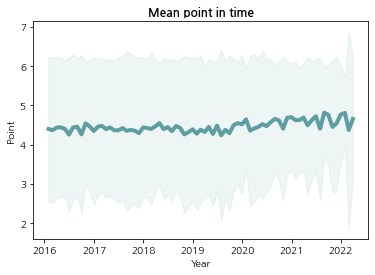

In [ ]:
plt.plot(series_mean, linewidth=4, color='cadetblue')
plt.fill_between(series_mean.index, (series_mean.values - 2*series_std.values).ravel(), (series_mean.values + 2*series_std.values).ravel(), color='cadetblue', alpha=.1)
plt.title('Mean point in time', fontweight='bold')
plt.xlabel('Year')
# plt.ylim(0, 6)
plt.ylabel('Point')
plt.show()

#### 평점 변동폭이 큰 고객  (최소 3년 이상 사이트 이용한 고객 대상, 평점 최대값과 최소값의 차이)

In [ ]:
point_2016

,m_no,point,regdt
3,29471,3.0,2017-01-01
7,29471,3.0,2017-01-01
10,29471,4.0,2017-09-01
11,29471,5.0,2017-09-01
18,29471,5.0,2017-09-01
...,...,...,...
99995,714257,5.0,2017-05-01
99996,714257,5.0,2018-03-01
99997,714257,5.0,2017-05-01
99998,714257,5.0,2018-11-01


In [ ]:
# point_2016_user = point_2016.groupby(['m_no', 'regdt']).mean('point')
point_2016_user = point_2016.copy()

In [ ]:
user_list = set(point_2016_user.m_no.values)
user_list = list(user_list)
len(user_list)

1536

In [ ]:
point_2016_user = point_2016_user.set_index('m_no')

In [ ]:
point_2016_user.loc[714257]

,point,regdt
m_no,,
714257,5.0,2019-04-01
714257,4.0,2017-07-01
714257,5.0,2017-08-01
714257,5.0,2019-07-01
714257,5.0,2017-05-01
714257,5.0,2018-03-01
714257,5.0,2017-05-01
714257,5.0,2018-11-01
714257,5.0,2017-06-01


In [ ]:
user_idx = [] 

for user in user_list:
  user_data = point_2016_user.loc[user]
  try:
    user_act_days = (max(user_data['regdt']) - min(user_data['regdt'])).days
  except:
    print(user)

  if user_act_days > 1825:
    user_idx.append(user)

# drop_user

263116


In [ ]:
len(user_idx)

140

In [ ]:
long_term_users = point_2016_user.loc[user_idx] 
long_term_users

,point,regdt
m_no,,
65540,5.0,2017-07-01
65540,5.0,2017-07-01
65540,3.0,2016-09-01
65540,5.0,2017-06-01
65540,5.0,2017-07-01
...,...,...
278485,5.0,2016-07-01
278485,5.0,2017-05-01
278485,5.0,2016-02-01


In [ ]:
long_term_users.reset_index(inplace=True)
long_term_users = long_term_users.groupby(['m_no', 'regdt']).mean('point')

In [ ]:
long_term_users.reset_index(inplace=True)
long_term_users.set_index('m_no', inplace=True)
long_term_users

,regdt,point
m_no,,
3569,2016-01-01,5.000000
3569,2016-05-01,4.166667
3569,2016-09-01,3.750000
3569,2017-06-01,4.000000
3569,2017-08-01,4.500000
...,...,...
648005,2021-06-01,5.000000
648005,2021-08-01,5.000000
648005,2021-09-01,5.000000


In [ ]:
col = ['regdt', 'avg_point'] 

long_term_users.columns = col
long_term_users

,regdt,avg_point
m_no,,
3569,2016-01-01,5.000000
3569,2016-05-01,4.166667
3569,2016-09-01,3.750000
3569,2017-06-01,4.000000
3569,2017-08-01,4.500000
...,...,...
648005,2021-06-01,5.000000
648005,2021-08-01,5.000000
648005,2021-09-01,5.000000


In [ ]:
user_list2 = list(set(long_term_users.index))
len(user_list2)

140

In [ ]:
user_idx2 = [] 

for user in user_list2:
  user_data = long_term_users.loc[user]
  try:
    user_point = (max(user_data['avg_point']) - min(user_data['avg_point']))
  except:
    print(user)

  if user_point > 3:
    # print(user_point)
    user_idx2.append(user)

len(user_idx2)

10

In [ ]:
user_analysis = long_term_users.loc[user_idx2]
user_analysis

,regdt,avg_point
m_no,,
293912,2016-02-01,4.500000
293912,2019-04-01,4.166667
293912,2022-02-01,1.000000
101415,2016-03-01,5.000000
101415,2016-07-01,5.000000
...,...,...
513470,2020-02-01,3.250000
513470,2021-03-01,5.000000
513470,2021-06-01,5.000000


In [ ]:
'''
import random

user = list(set(user_analysis['m_no']))
user_list = random.sample(user, 10)
'''

"\nimport random\n\nuser = list(set(user_analysis['m_no']))\nuser_list = random.sample(user, 10)\n"

In [ ]:
user_idx2

[293912,
 101415,
 128089,
 214152,
 318609,
 633125,
 272742,
 224651,
 302482,
 513470]

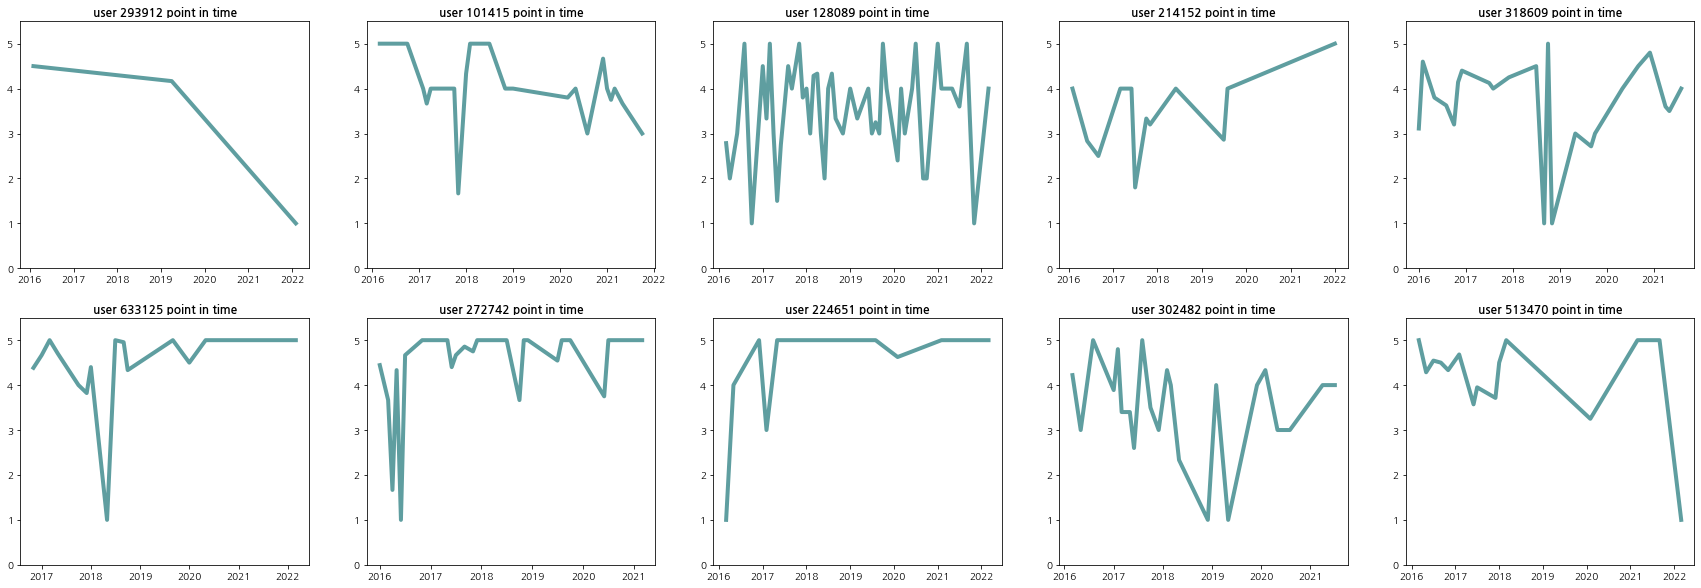

In [ ]:
f, ax = plt.subplots(2, 5, figsize=(30, 10))
# colors = ['greenyellow', 'orange', 'gold', 'tomato', 'blue']

k = 0 
for i in range(2):
  for j in range(5):
    try: 
      user = user_idx2[k]
      user_data = user_analysis.loc[user]
      ax[i, j].plot(user_data['regdt'], user_data['avg_point'], linewidth=4, color='cadetblue')
      ax[i, j].set_title(f'user {user} point in time', fontweight='bold')
      ax[i, j].set_ylim(0, 5.5)
      k += 1 
    except:
      ax[i, j].set_visible(False)

plt.show()

#### 카테고리 별 평점평균 변화량 분석 

In [3]:
reviews = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/review_dataset/etc/dog_reviews_400000.csv')
cate_col = ['goodsno', 'm_no', 'point', 'regdt', 'catnm']

data_cate = reviews[cate_col]
data_cate

,goodsno,m_no,point,regdt,catnm
0,85041,655259,5.0,2017-03-17 13:34:20.000,사사미
1,19447,893130,5.0,2018-07-05 16:30:30.000,껌
2,2003,435351,5.0,2016-11-12 08:59:34.000,저키/트릿
3,19309,327020,4.0,2021-06-02 12:59:34.000,사사미
4,910,628895,5.0,2017-01-10 19:43:12.000,저키/트릿
...,...,...,...,...,...
399995,13749,101704,5.0,2011-01-19 19:56:23.000,종합영양제
399996,13529,1043782,5.0,2020-12-20 12:41:52.000,캔/파우치
399997,17539,293593,5.0,2014-10-15 16:15:39.000,치아
399998,20442,913889,5.0,2020-03-10 14:37:00.000,사사미


In [4]:
cate_list = data_cate['catnm'].unique()
cate_list 

array(['사사미', '껌', '저키/트릿', '급수기/물병', '치아', '사료샘플', '건식사료', '봉제장난감',
       '배변봉투/집게', '해충방지', '기저귀/팬티', '치실장난감', '캔/파우치', '샴푸/린스', '습식사료',
       '비스켓/시리얼', '배변패드', '눈/귀', '뼈/관절', '보관통/사료스푼', '패딩/코트', '소프트사료',
       '종합영양제', '노즈워크', '리드줄', '식기/식탁', '발톱/발 관리', '수제간식', '배변판', '공',
       '소시지', '가슴줄', '건조간식', '미용가위', '피부/털', '파우더', '이동가방', '배변유도제',
       '소화기', '철장/울타리', '브러쉬/거치대', '짖음 제어', '후드티', '티셔츠', '계단', '스카프/타이',
       '올인원', '신발/양말', '물티슈/크리너', '칫솔', '방석/매트', '타월/가운', '클리퍼', '음료',
       '분유', '인식표', '머리핀/고무줄', '에센스/향수', '안전문', '탈취/소독', '고무장난감', '생활용품',
       '청소용품', '정수기/필터', '하우스', '목줄', '체험상품', '염색약/그루밍파우더', '원피스',
       '수제사료(X)', '서적', '자동리드줄 (X)', '클리커 트레이닝', '행동 제어', '심장/심신안정',
       '신장/요로', '치약', '세트 (X)', '네이버', '면역력/식변증', '젖병', '원반', '세트',
       '건조생식', '목걸이', '구강청결제', '구강티슈', '사은품', '처방사료', '그외 (X)', '유모차',
       '차량용', '자동급식기', '식기매트', '야외용', '유기농사료 (X)', '엘리자베스 카라(x)',
       '프로모션 사은품', '공기청정', '팬시', '가전', '카메라 (X)'], dtype=object)

In [5]:
data_cate['regdt'] = pd.to_datetime(data_cate['regdt'], format='%Y-%m-%d')
data_cate['regdt'] = data_cate['regdt'].dt.strftime('%Y-%m')
data_cate['regdt'] = pd.to_datetime(data_cate['regdt'], format='%Y-%m')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [6]:
data_cate

,goodsno,m_no,point,regdt,catnm
0,85041,655259,5.0,2017-03-01,사사미
1,19447,893130,5.0,2018-07-01,껌
2,2003,435351,5.0,2016-11-01,저키/트릿
3,19309,327020,4.0,2021-06-01,사사미
4,910,628895,5.0,2017-01-01,저키/트릿
...,...,...,...,...,...
399995,13749,101704,5.0,2011-01-01,종합영양제
399996,13529,1043782,5.0,2020-12-01,캔/파우치
399997,17539,293593,5.0,2014-10-01,치아
399998,20442,913889,5.0,2020-03-01,사사미


In [7]:
point_table = data_cate[['catnm', 'point', 'regdt']]

point_table

,catnm,point,regdt
0,사사미,5.0,2017-03-01
1,껌,5.0,2018-07-01
2,저키/트릿,5.0,2016-11-01
3,사사미,4.0,2021-06-01
4,저키/트릿,5.0,2017-01-01
...,...,...,...
399995,종합영양제,5.0,2011-01-01
399996,캔/파우치,5.0,2020-12-01
399997,치아,5.0,2014-10-01
399998,사사미,5.0,2020-03-01


In [8]:
cate_2016 = point_table.loc[point_table.regdt.values >= pd.to_datetime('2016-01-01')]

cate_2016

,catnm,point,regdt
0,사사미,5.0,2017-03-01
1,껌,5.0,2018-07-01
2,저키/트릿,5.0,2016-11-01
3,사사미,4.0,2021-06-01
4,저키/트릿,5.0,2017-01-01
...,...,...,...
399993,비스켓/시리얼,4.0,2016-11-01
399994,샴푸/린스,5.0,2019-05-01
399996,캔/파우치,5.0,2020-12-01
399998,사사미,5.0,2020-03-01


In [9]:
cate_list

array(['사사미', '껌', '저키/트릿', '급수기/물병', '치아', '사료샘플', '건식사료', '봉제장난감',
       '배변봉투/집게', '해충방지', '기저귀/팬티', '치실장난감', '캔/파우치', '샴푸/린스', '습식사료',
       '비스켓/시리얼', '배변패드', '눈/귀', '뼈/관절', '보관통/사료스푼', '패딩/코트', '소프트사료',
       '종합영양제', '노즈워크', '리드줄', '식기/식탁', '발톱/발 관리', '수제간식', '배변판', '공',
       '소시지', '가슴줄', '건조간식', '미용가위', '피부/털', '파우더', '이동가방', '배변유도제',
       '소화기', '철장/울타리', '브러쉬/거치대', '짖음 제어', '후드티', '티셔츠', '계단', '스카프/타이',
       '올인원', '신발/양말', '물티슈/크리너', '칫솔', '방석/매트', '타월/가운', '클리퍼', '음료',
       '분유', '인식표', '머리핀/고무줄', '에센스/향수', '안전문', '탈취/소독', '고무장난감', '생활용품',
       '청소용품', '정수기/필터', '하우스', '목줄', '체험상품', '염색약/그루밍파우더', '원피스',
       '수제사료(X)', '서적', '자동리드줄 (X)', '클리커 트레이닝', '행동 제어', '심장/심신안정',
       '신장/요로', '치약', '세트 (X)', '네이버', '면역력/식변증', '젖병', '원반', '세트',
       '건조생식', '목걸이', '구강청결제', '구강티슈', '사은품', '처방사료', '그외 (X)', '유모차',
       '차량용', '자동급식기', '식기매트', '야외용', '유기농사료 (X)', '엘리자베스 카라(x)',
       '프로모션 사은품', '공기청정', '팬시', '가전', '카메라 (X)'], dtype=object)

In [11]:
cate_2016

,catnm,point,regdt
0,사사미,5.0,2017-03-01
1,껌,5.0,2018-07-01
2,저키/트릿,5.0,2016-11-01
3,사사미,4.0,2021-06-01
4,저키/트릿,5.0,2017-01-01
...,...,...,...
399993,비스켓/시리얼,4.0,2016-11-01
399994,샴푸/린스,5.0,2019-05-01
399996,캔/파우치,5.0,2020-12-01
399998,사사미,5.0,2020-03-01


In [ ]:
cate_cnt = dict()

for idx in range(len(cate_list)):
  cate_cnt[cate_list[idx]] = len(cate_2016.loc[cate_2016['catnm'] == cate_list[idx]])

cate_cnt

In [23]:
cate_count = [] 

for c_type, count in cate_cnt.items():
  if count > 5: 
    cate_count.append([c_type, count])

cate_count.sort(key= lambda x: -x[1])
cate_count[:10]

[['껌', 47021],
 ['저키/트릿', 29144],
 ['사사미', 27449],
 ['건식사료', 19453],
 ['배변패드', 11760],
 ['비스켓/시리얼', 8275],
 ['치아', 8057],
 ['캔/파우치', 7875],
 ['봉제장난감', 7204],
 ['샴푸/린스', 6131]]

In [24]:
cate_count[-10:]

[['사은품', 33],
 ['원피스', 32],
 ['자동급식기', 24],
 ['젖병', 21],
 ['수제사료(X)', 20],
 ['목걸이', 17],
 ['식기매트', 14],
 ['유모차', 11],
 ['구강티슈', 10],
 ['공기청정', 6]]

In [25]:
best_cate_10 = [] 
worst_cate_10 = []

for c_type, cnt in cate_count[:10]:
  best_cate_10.append(c_type)

for c_type, cnt in cate_count[-10:]:
  worst_cate_10.append(c_type)

In [26]:
worst_cate_10

['사은품', '원피스', '자동급식기', '젖병', '수제사료(X)', '목걸이', '식기매트', '유모차', '구강티슈', '공기청정']

In [27]:
cate_2016.loc[cate_2016['catnm'] == best_cate_10[0]]

,catnm,point,regdt
1,껌,5.0,2018-07-01
14,껌,5.0,2021-08-01
20,껌,5.0,2019-08-01
26,껌,5.0,2020-01-01
31,껌,4.0,2016-09-01
...,...,...,...
399933,껌,5.0,2020-01-01
399939,껌,5.0,2017-09-01
399941,껌,5.0,2020-10-01
399945,껌,4.0,2018-05-01


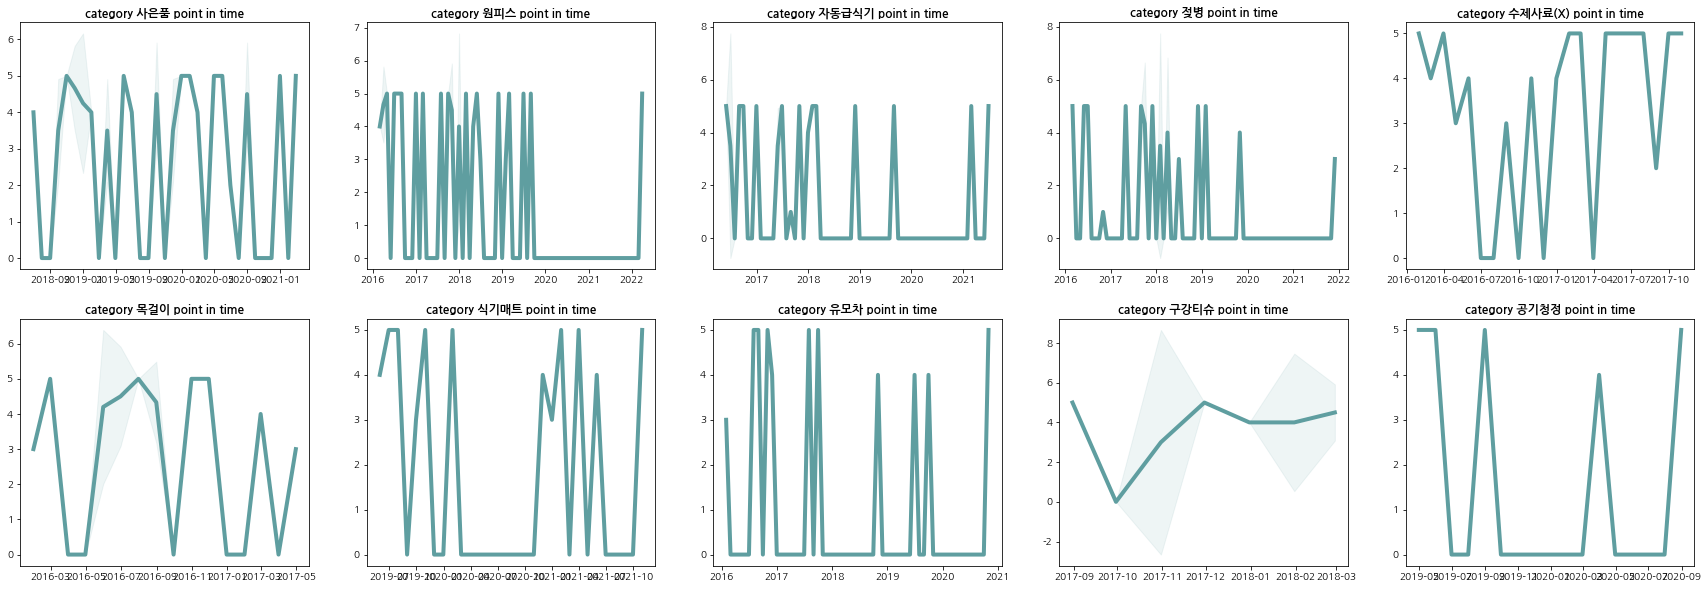

In [49]:
f, ax = plt.subplots(2, 5, figsize=(30, 10))
# colors = ['greenyellow', 'orange', 'gold', 'tomato', 'blue']

idx = 0 
for i in range(2):
  for j in range(5):
    try: 
      cate_table = cate_2016.loc[cate_2016['catnm'] == worst_cate_10[idx]]
      series_mean = cate_table[['regdt','point']].groupby(pd.Grouper(key='regdt', freq='M')).mean().fillna(0)
      series_std = cate_table[['regdt', 'point']].groupby(pd.Grouper(key='regdt', freq='M')).std().fillna(0)
      ax[i, j].plot(series_mean, linewidth=4, color='cadetblue')
      ax[i, j].fill_between(series_mean.index, (series_mean.values - 2*series_std.values).ravel(), (series_mean.values + 2*series_std.values).ravel(), color='cadetblue', alpha=.1)
      ax[i, j].set_title(f'category {worst_cate_10[idx]} point in time', fontweight='bold')
      # ax[i, j].xticks(rotation=45)
      # ax[i, j].set_ylim(0, 5.5)
      idx += 1
      # ax[i, j].set_xticklabels(series_mean.index)
      # ax[i, j].tick_params(labelrotation=45)
    except:
      ax[i, j].set_visible(False)
  
plt.show()

In [44]:
date = series_mean.index
list(map(lambda x: x[:4], date))

TypeError: ignored